<a href="https://colab.research.google.com/github/jecampagne/cours_mallat_cdf/blob/main/morlet_wave_1D_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 20

# Morlet Wavelet in 1D and 2D


## 1D

In [ ]:
def psi(x,sig=np.pi):
  return (np.exp(1j*x*sig) - np.exp(-sig**2/2.))/(np.exp(x**2/2.)*np.sqrt(1 - np.exp(-sig**2) - 2/np.exp((3*sig**2)/4.))*np.pi**0.25)

In [ ]:
def psihat(w,sig=np.pi):
  return (np.exp(-(sig - w)**2/2.) - np.exp(-0.5*sig**2 - w**2/2.))/(np.sqrt(1 - np.exp(-sig**2) - 2/np.exp((3*sig**2)/4.))*np.pi**0.25)

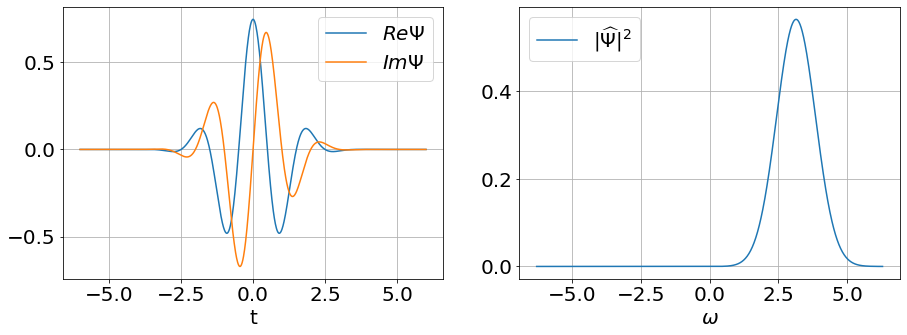

In [ ]:
x = np.linspace(-6,6,1000)
w = np.linspace(-2*np.pi, 2*np.pi, 1000)
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(x,np.real(psi(x)), label=f'$Re \Psi$')
axs[0].plot(x,np.imag(psi(x)),label=f'$Im \Psi$')
axs[0].grid()
axs[0].legend();
axs[0].set_xlabel("t");
axs[1].plot(w, np.abs(psihat(w))**2, label=r"$|\widehat{\Psi}|^2$");
axs[1].grid()
axs[1].legend();
axs[1].set_xlabel(r"$\omega$");



In [ ]:
w = np.linspace(0, 10*np.pi, 10000)

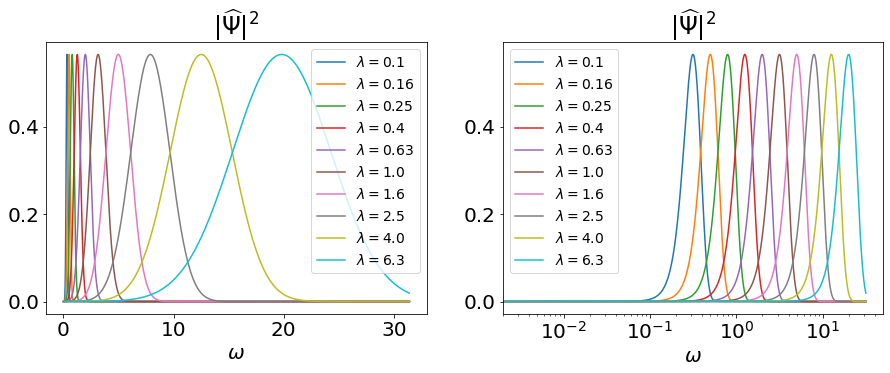

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
for l in np.logspace(-1,1,10, endpoint=False):
  axs[0].plot(w, np.abs(psihat(w/l))**2, label=f"$\lambda={l:.2}$");
  axs[1].plot(w, np.abs(psihat(w/l))**2, label=f"$\lambda={l:.2}$");

axs[0].legend(fontsize=14);
axs[0].set_xlabel(r"$\omega$");
axs[0].set_title(r"$|\widehat{\Psi}|^2$");
axs[1].legend(fontsize=14);
axs[1].set_xlabel(r"$\omega$");
axs[1].set_xscale("log")
axs[1].set_title(r"$|\widehat{\Psi}|^2$");

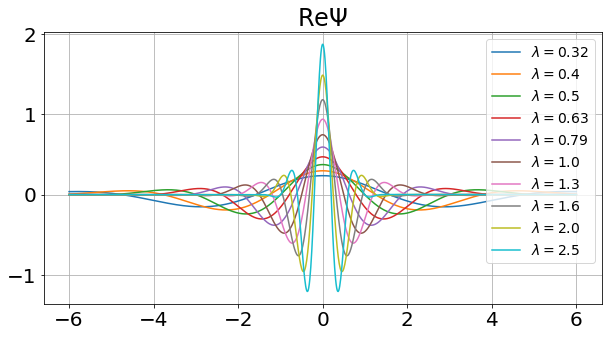

In [ ]:
t = np.linspace(-6,6,1000)
plt.figure(figsize=(10,5))
for l in np.logspace(-0.5,0.5,10, endpoint=False):
  plt.plot(t, np.real(l*psi(t*l)), label=f"$\lambda={l:.2}$");
plt.legend(fontsize=14);
plt.grid();
plt.title(r"Re$\Psi$");

# 2D

In [70]:
def psi(u1,u2,s,xi):
   return np.exp(-(u1**2+u2**2)/(2*s**2))*(np.exp(1j*xi*u1)-np.exp(-xi**2/2.))

In [71]:
def psihat(w1,w2,s,xi):
  return 2*np.pi*s**2*np.exp(-(w2*s)**2/2.)*(np.exp(-((w1-xi)*s)**2/2.) - np.exp(-(xi**2+(w1*s)**2)/2.))

In [72]:
sigma = 1.
xi = 5*np.pi/4.

In [73]:
numb_steps = 128
x = np.linspace(-5, 5, numb_steps)
y = np.linspace(-5, 5, numb_steps)
U1,U2 = np.meshgrid(x,y)
dx = (x[1]-x[0])/2.
dy = (y[1]-y[0])/2.
extent_real = [x[0]-dx, x[-1]+dx, y[0]-dy, y[-1]+dy]


In [74]:
Z_psi = psi(U1,U2,s=sigma,xi=xi)

In [75]:
u = np.linspace(-6, 6, numb_steps)
v = np.linspace(-6, 6, numb_steps)
W1,W2 = np.meshgrid(u,v)
du = (u[1]-u[0])/2.
dv = (v[1]-v[0])/2.
extent_fourier = [u[0]-du, u[-1]+du, u[0]-du, u[-1]+du]


In [76]:
Z_psihat = psihat(W1,W2,s=sigma,xi=xi)

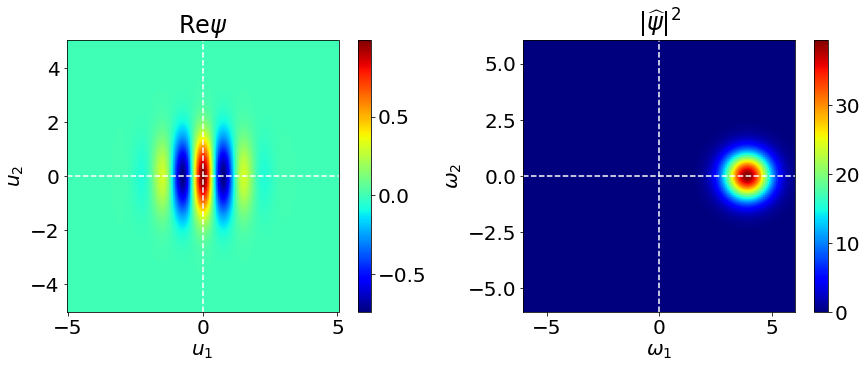

In [78]:
fig, axs= plt.subplots(1,2,figsize=(15,5))
img0=axs[0].imshow(np.real(Z_psi), extent=extent_real,  origin='lower'); plt.colorbar(img0,ax=axs[0]);
axs[0].axhline(y=0, color='white', ls="--")
axs[0].axvline(x=0, color='white',ls="--")
axs[0].set_xlabel(r"$u_1$")
axs[0].set_ylabel(r"$u_2$");
axs[0].set_title(r"Re$\psi$");

img1=axs[1].imshow(np.abs(Z_psihat)**2, extent=extent_fourier,  origin='lower'); plt.colorbar(img1,ax=axs[1]);
axs[1].axhline(y=0, color='white', ls="--")
axs[1].axvline(x=0, color='white',ls="--")
axs[1].set_xlabel(r"$\omega_1$")
axs[1].set_ylabel(r"$\omega_2$");
axs[1].set_title(r"$|\widehat{\psi}|^2$");

In [62]:
def psiRotScaled(u1,u2,j,t,s=sigma,xi=xi):
  u1 = u1/2**j
  u2 = u2/2**j
  up1 = np.cos(t) * u1 - np.sin(t)*u2
  up2 = np.sin(t) * u1 + np.cos(t)*u2
  return 1/2**(2*j) * psi(up1,up2,s,xi)


In [87]:
def psihatRotScaled(w1,w2,j,t,s=sigma,xi=xi):
  w1 = 2**j * w1
  w2 = 2**j * w2
  wp1 =  np.cos(t) * w1 + np.sin(t)*w2
  wp2 = -np.sin(t) * w1 + np.cos(t)*w2
  return psihat(wp1,wp2,s,xi)


In [88]:
numb_steps = 128*2
x = np.linspace(-12, 12, numb_steps)
y = np.linspace(-12, 12, numb_steps)
U1,U2 = np.meshgrid(x,y)
dx = (x[1]-x[0])/2.
dy = (y[1]-y[0])/2.
extent_real = [x[0]-dx, x[-1]+dx, y[0]-dy, y[-1]+dy]


u = np.linspace(-12, 12, numb_steps)
v = np.linspace(-12, 12, numb_steps)
W1,W2 = np.meshgrid(u,v)
du = (u[1]-u[0])/2.
dv = (v[1]-v[0])/2.
extent_fourier = [u[0]-du, u[-1]+du, u[0]-du, u[-1]+du]


In [93]:
Z_psirot = psiRotScaled(U1,U2,j=-1,t=np.deg2rad(30.),s=sigma,xi=xi)
Z_psihatrot = psihatRotScaled(W1,W2,j=-1,t=np.deg2rad(30.),s=sigma,xi=xi)


Z_psirot_2 = psiRotScaled(U1,U2,j=1,t=np.deg2rad(-30.),s=sigma,xi=xi)
Z_psihatrot_2 = psihatRotScaled(W1,W2,j=1,t=np.deg2rad(-30.),s=sigma,xi=xi)

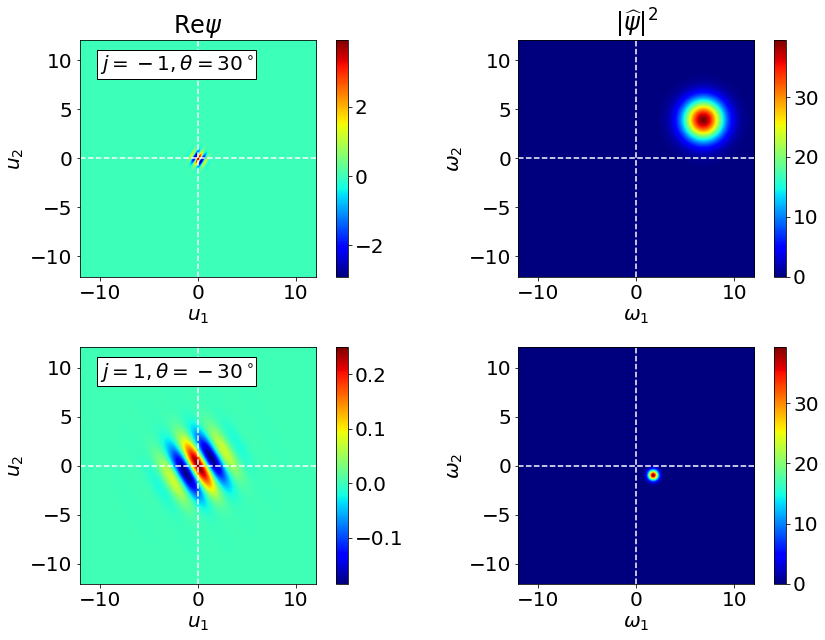

In [119]:
fig, axs= plt.subplots(2,2,figsize=(15,10), )
img00=axs[0,0].imshow(np.real(Z_psirot), extent=extent_real, origin='lower'); 
plt.colorbar(img00,ax=axs[0,0]);
axs[0,0].axhline(y=0, color='white', ls="--")
axs[0,0].axvline(x=0, color='white',ls="--")
axs[0,0].set_xlabel(r"$u_1$")
axs[0,0].set_ylabel(r"$u_2$");
axs[0,0].set_title(r"Re$\psi$");
axs[0,0].text(-10, 9, r"$j=-1,\theta=30^\circ$", bbox={'facecolor': 'white', 'pad': 3})

img01=axs[0,1].imshow(np.abs(Z_psihatrot)**2, extent=extent_fourier,  origin='lower'); plt.colorbar(img01,ax=axs[0,1]);
axs[0,1].axhline(y=0, color='white', ls="--")
axs[0,1].axvline(x=0, color='white',ls="--")
axs[0,1].set_xlabel(r"$\omega_1$")
axs[0,1].set_ylabel(r"$\omega_2$");
axs[0,1].set_title(r"$|\widehat{\psi}|^2$");


img10=axs[1,0].imshow(np.real(Z_psirot_2), extent=extent_real, origin='lower'); plt.colorbar(img10,ax=axs[1,0]);
axs[1,0].axhline(y=0, color='white', ls="--")
axs[1,0].axvline(x=0, color='white',ls="--")
axs[1,0].set_xlabel(r"$u_1$")
axs[1,0].set_ylabel(r"$u_2$");
#axs[1,0].set_title(r"Re$\psi$");
axs[1,0].text(-10, 9, r"$j=1,\theta=-30^\circ$", bbox={'facecolor': 'white', 'pad': 3})

img11=axs[1,1].imshow(np.abs(Z_psihatrot_2)**2, extent=extent_fourier,  origin='lower'); plt.colorbar(img1,ax=axs[1,1]);
axs[1,1].axhline(y=0, color='white', ls="--")
axs[1,1].axvline(x=0, color='white',ls="--")
axs[1,1].set_xlabel(r"$\omega_1$")
axs[1,1].set_ylabel(r"$\omega_2$");
#axs[1,1].set_title(r"$|\widehat{\psi}|^2$");

plt.subplots_adjust(wspace=0.1, hspace=0.3)

In [176]:
sigma = 1
xi = 5*np.pi/4.
Nblobs=12
info=[]
for t in np.arange(0,Nblobs,1)*360/Nblobs:
  tmp1 = psihatRotScaled(W1,W2,j=-1,t=np.deg2rad(t),s=sigma,xi=xi)  
  info.append(tmp1)
  tmp1 = psihatRotScaled(W1,W2,j=0,t=np.deg2rad(t),s=sigma,xi=xi)  
  info.append(tmp1)
  tmp1 = psihatRotScaled(W1,W2,j=1,t=np.deg2rad(t),s=sigma,xi=xi)
  info.append(tmp1)

data = np.array(info)
data=np.abs(data)**2
data = np.sum(data,axis=0)

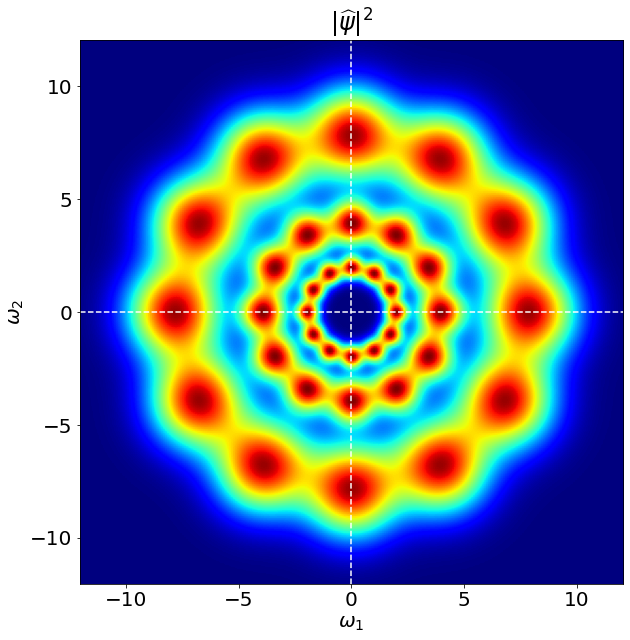

In [177]:
plt.figure(figsize=(10,10))
plt.imshow(data, extent=extent_fourier, origin='lower');
plt.axhline(y=0, color='white', ls="--")
plt.axvline(x=0, color='white',ls="--")
plt.xlabel(r"$\omega_1$")
plt.ylabel(r"$\omega_2$");
plt.title(r"$|\widehat{\psi}|^2$");

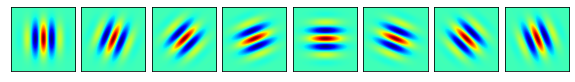

In [171]:
sigma = 1
xi = 5*np.pi/4.

Nblobs=8
info=[]
fig, ax= plt.subplots(1,Nblobs, figsize=(10,5))
for i,t in enumerate(np.arange(0,Nblobs,1)*180/Nblobs):
  Z_psirot = psiRotScaled(U1,U2,j=2,t=np.deg2rad(t),s=sigma,xi=xi)
  ax[i].imshow(np.real(Z_psirot), extent=extent_real, origin='lower');
  ax[i].set_xticks([])
  ax[i].set_yticks([])

plt.subplots_adjust(wspace=0.1, hspace=0.3)